In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
import catboost as cb
import lightgbm as lgb
import shap

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

c:\Users\Dell\anaconda3\envs\lipu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def data_load():
    data=pd.read_excel('./use.xlsx')
    train_data,test_data=train_test_split(data,test_size=0.2, random_state=1314)
    feature=train_data.drop(['Y'],axis=1)
    label=train_data['Y']
    return feature,label,test_data

In [3]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)
log_param1 = [1e-2, 1e-1, 1.0, 10, 1e2]
log_param2 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
log_param3 = [1.0, 10, 1e2, 1e3, 1e4, 1e5]

In [4]:
model=['LightGBM','AdaBoost','Catboost','Lasso','Ridge','GPR','SVR','RFR','ETR','XGB']
r2=[]
rmse=[]
feat, target ,test_data = data_load()

In [5]:
feat.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# LightGBM
cvmodel = GridSearchCV(lgb.LGBMRegressor(random_state=1314,iterations=300,verbose=-1,lambda_l2=0.231,learning_rate=0.1),
                       param_grid={'max_depth':[1,10]},
                       n_jobs = -1)
print('LightGBM:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

LightGBM:
r2: 0.6692136803584717
rmse: 0.08248121465517093
----------------


In [7]:

#AdaBoost
cvmodel = GridSearchCV(AdaBoostRegressor( random_state = 1314,learning_rate=2),
                        param_grid = {'n_estimators':[100,300,500, 1000]},
                        n_jobs = -1)
print('AdaBoost:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

AdaBoost:
r2: 0.3235691859098025
rmse: 0.11803672174264182
----------------


In [8]:
# CatBoost
cvmodel = GridSearchCV(cb.CatBoostRegressor(random_state=1314,iterations=500,silent=True,learning_rate=0.1),
                       param_grid={'depth':[1,10]},
                       n_jobs = -1)
print('Catboost:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

Catboost:
r2: 0.7244230823772831
rmse: 0.07592061865617489
----------------


In [9]:
#Lasso
cvmodel = GridSearchCV(Lasso(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
print('Lasso:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


Lasso:
r2: 0.14798196464361896
rmse: 0.13339713294232347
----------------


In [10]:

#Ridge
cvmodel = GridSearchCV(Ridge(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
print('Ridge:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


Ridge:
r2: 0.19192927176737914
rmse: 0.12988490319905502
----------------


In [11]:

#GPR
kernel = gp.kernels.Matern(nu = 2.5)
cvmodel = GridSearchCV(gp.GaussianProcessRegressor(kernel = kernel,
                                                    normalize_y = True,
                                                    n_restarts_optimizer = 10,
                                                    random_state = 1314),
                        param_grid = {'alpha':log_param2},
                        n_jobs = -1)
print('GPR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


GPR:
r2: 0.6107158720048294
rmse: 0.09088948755079364
----------------


In [12]:

#SVR
cvmodel = GridSearchCV(SVR(kernel = 'rbf'),
                        param_grid = {'C': log_param3,
                                        'gamma':log_param2,
                                        'epsilon':log_param1},
                        n_jobs = -1)
print('SVR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


SVR:
r2: 0.5240116687262126
rmse: 0.09969987260133045
----------------


In [13]:

#RFR
cvmodel = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 1314),
                        param_grid = {'n_estimators':[500, 1000]},
                        n_jobs = -1)
print('RFR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


RFR:
r2: 0.6847785740413845
rmse: 0.08147255504465327
----------------


In [14]:

#ETR
cvmodel = GridSearchCV(ExtraTreesRegressor(n_jobs = -1, random_state = 1314),
                        param_grid = {'n_estimators':[500, 1000]},
                        n_jobs = -1)
print('ETR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')


ETR:
r2: 0.743644137511366
rmse: 0.07338528329063636
----------------


In [15]:

#XGB
cvmodel = GridSearchCV(XGBRegressor(n_jobs = -1, random_state = 1314,learning_rate=0.1),
                        param_grid = {'n_estimators':[300, 500],'max_depth':[2,3,4,5,6,7,8,9,10]},
                        n_jobs = -1)
print('XGB:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
rmse.append(pow(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5))
print('r2:',r2[-1])
print('rmse:',rmse[-1])
print('----------------')

XGB:
r2: 0.716455447999252
rmse: 0.07731155451388608
----------------


In [16]:
model=['LGBM','Ada','Cat','Lasso','Ridge','GPR','SVR','RFR','ETR','XGB']
c={'model' : model,
   'R2' : r2,
   'RMSE' : rmse
   }
final=pd.DataFrame(c)
final

,model,R2,RMSE
0,LGBM,0.669214,0.082481
1,Ada,0.323569,0.118037
2,Cat,0.724423,0.075921
3,Lasso,0.147982,0.133397
4,Ridge,0.191929,0.129885
5,GPR,0.610716,0.090889
6,SVR,0.524012,0.099700
7,RFR,0.684779,0.081473
8,ETR,0.743644,0.073385
9,XGB,0.716455,0.077312


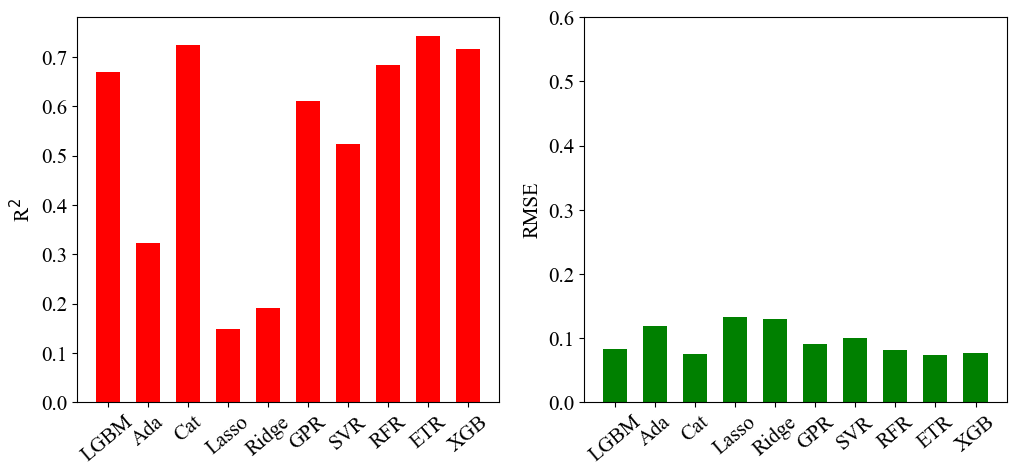

In [31]:
from pathlib import Path
fig,axs=plt.subplots(1,2,figsize=(12,5))
# fig.suptitle('硼基催化剂中中各个模型拟合效果评估',y=0)

axs[0].bar(final.iloc[:,0],final.iloc[:,1],width=0.6,fc='r')
axs[0].set_ylabel('R$^2$',font=Path('..\TimesNewRoman.ttf'),fontsize=15)
x1_label = axs[0].get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
[x1_label_temp.set_fontsize(15) for x1_label_temp in x1_label]
[x1_label_temp.set_rotation(40) for x1_label_temp in x1_label]
y1_label = axs[0].get_yticklabels() 
[y1_label_temp.set_fontsize(15) for y1_label_temp in y1_label]
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
axs[1].bar(final.iloc[:,0],final.iloc[:,2],width=0.6,fc='g')
axs[1].set_ylabel('RMSE',font=Path('..\TimesNewRoman.ttf'),fontsize=15)
x2_label = axs[1].get_xticklabels() 
[x2_label_temp.set_fontname('Times New Roman') for x2_label_temp in x2_label]
[x2_label_temp.set_fontsize(15) for x2_label_temp in x2_label]
[x2_label_temp.set_rotation(40) for x2_label_temp in x2_label]
y2_label = axs[1].get_yticklabels() 
[y2_label_temp.set_fontname('Times New Roman') for y2_label_temp in y2_label]
[y2_label_temp.set_fontsize(15) for y2_label_temp in y2_label]
axs[1].set_ylim(0,0.6)
plt.show()

In [ ]:
# 预测
Y1=cross_val_predict(estimator=cvmodel,X=test_data.drop(['Y'],axis=1),y=test_data['Y'])
Y2=test_data['Y']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)
pred_show

,Y_pred,Y_True
351,0.336757,0.185000
76,0.428366,0.390830
199,0.269935,0.297000
254,0.118574,0.027900
172,0.270586,0.216916
...,...,...
497,0.141272,0.264000
367,0.211793,0.209000
247,0.406743,0.205400
488,0.296504,0.367251


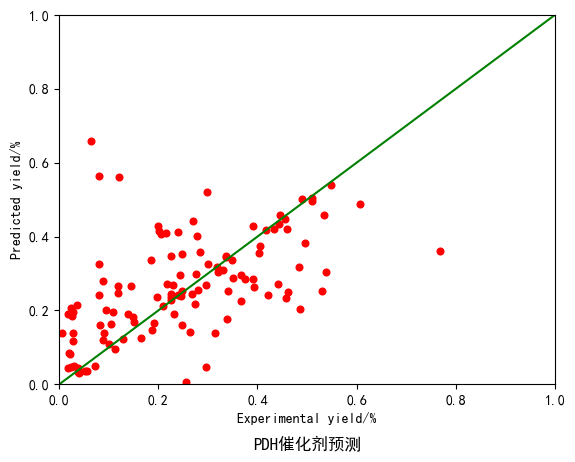

In [ ]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=23)
plt.title('PDH催化剂预测',y=-0.20)
plt.xlim((0,1))
plt.xlabel('Experimental yield/%')
plt.ylim((0,1))
plt.ylabel('Predicted yield/%')
plt.plot([0,1],[0,1],color='g')
plt.show()

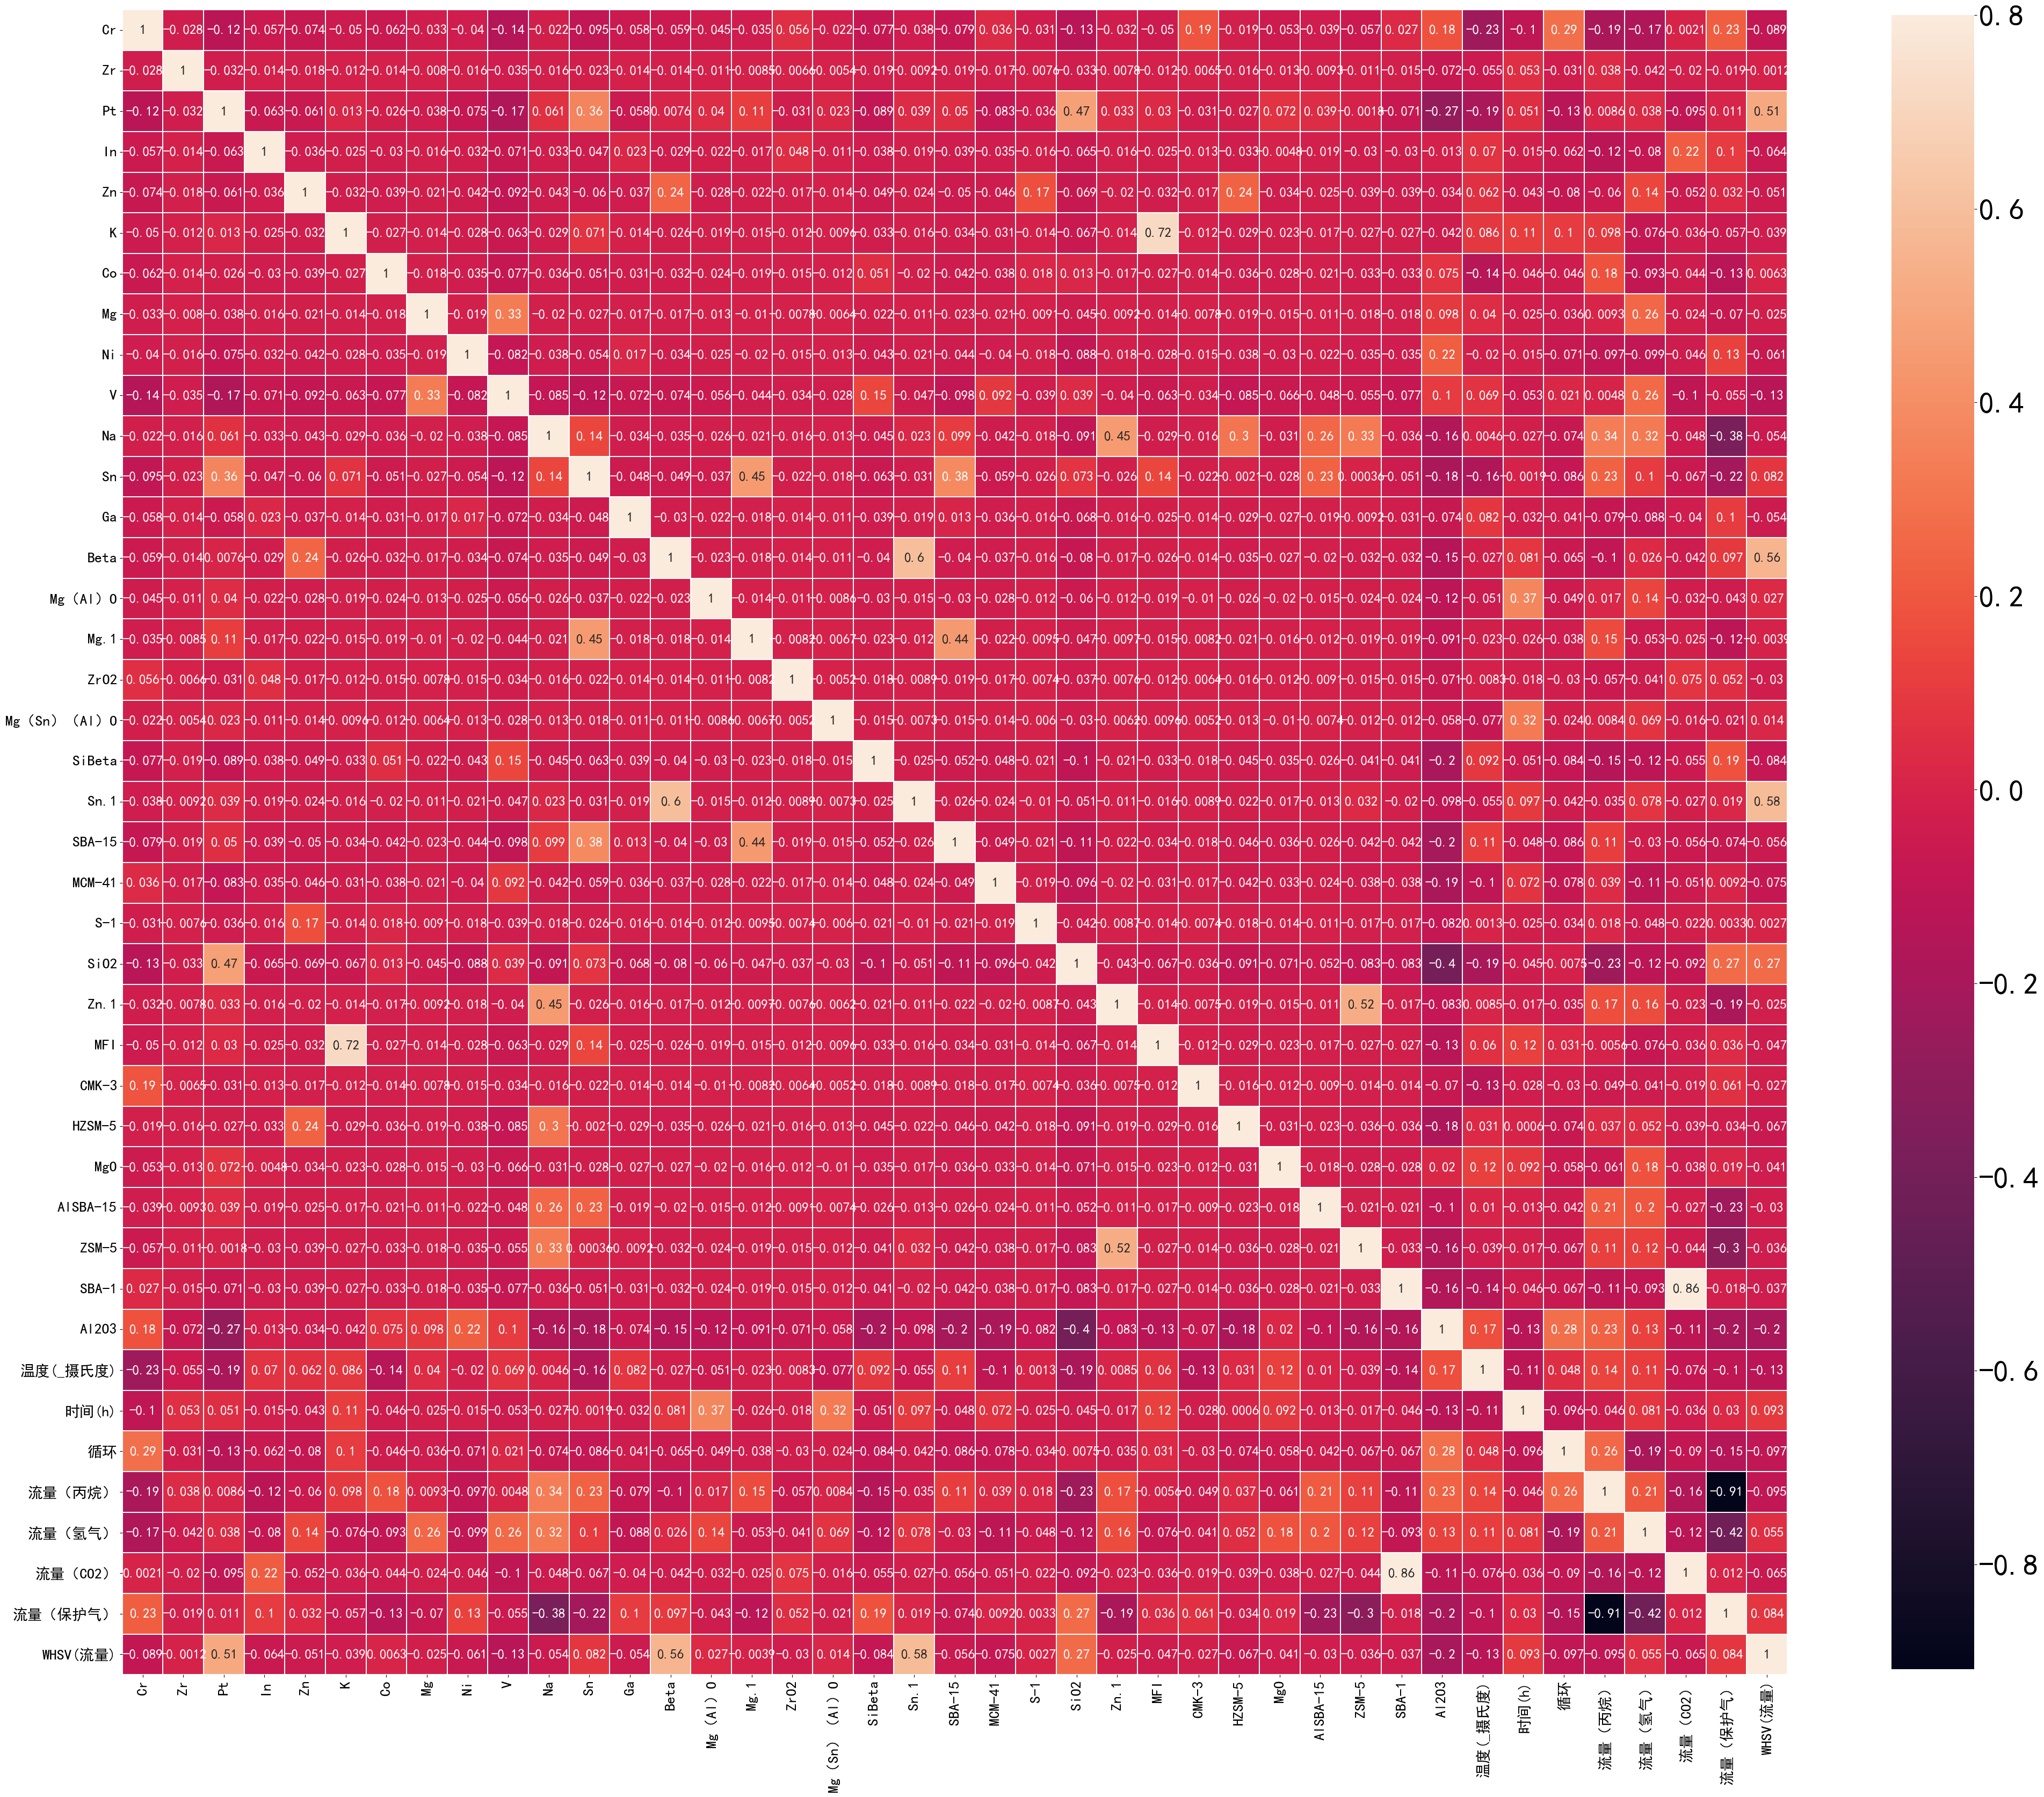

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(feat.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()

In [ ]:
feat.corr(method='pearson')

,Cr,Zr,Pt,In,Zn,K,Co,Mg,Ni,V,...,SBA-1,Al2O3,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量)
Cr,1.000000,-0.027921,-0.122598,-0.056989,-0.073634,-0.050145,-0.061884,-0.033267,-0.040381,-0.144054,...,0.027485,0.179565,-0.232552,-0.103556,0.285399,-0.187792,-0.173592,0.002090,0.225246,-0.088574
Zr,-0.027921,1.000000,-0.032309,-0.013778,-0.017802,-0.012123,-0.013743,-0.008043,-0.015790,-0.034664,...,-0.014899,-0.072454,-0.054775,0.053303,-0.030557,0.037851,-0.042349,-0.019880,-0.018824,-0.001172
Pt,-0.122598,-0.032309,1.000000,-0.062975,-0.060999,0.012605,-0.026101,-0.038432,-0.075452,-0.166806,...,-0.071192,-0.269554,-0.188084,0.050531,-0.128273,0.008618,0.037894,-0.094996,0.011132,0.512719
In,-0.056989,-0.013778,-0.062975,1.000000,-0.036276,-0.024704,-0.030488,-0.016389,-0.032176,-0.071134,...,-0.030360,-0.013242,0.070472,-0.015035,-0.062268,-0.123418,-0.080496,0.216182,0.101383,-0.064219
Zn,-0.073634,-0.017802,-0.060999,-0.036276,1.000000,-0.031920,-0.039393,-0.021176,-0.041574,-0.091910,...,-0.039227,-0.034264,0.061729,-0.043308,-0.080455,-0.059679,0.143227,-0.052343,0.031766,-0.050949
K,-0.050145,-0.012123,0.012605,-0.024704,-0.031920,1.000000,-0.026827,-0.014421,-0.028312,-0.062591,...,-0.026714,-0.041672,0.086260,0.112032,0.102156,0.097783,-0.075933,-0.035646,-0.057449,-0.039085
Co,-0.061884,-0.013743,-0.026101,-0.030488,-0.039393,-0.026827,1.000000,-0.017797,-0.034940,-0.077244,...,-0.032968,0.074749,-0.138133,-0.046249,-0.045726,0.183506,-0.092822,-0.043991,-0.128181,0.006295
Mg,-0.033267,-0.008043,-0.038432,-0.016389,-0.021176,-0.014421,-0.017797,1.000000,-0.018783,0.327901,...,-0.017723,0.097735,0.039939,-0.025393,-0.036349,0.009289,0.257052,-0.023648,-0.070225,-0.024769
Ni,-0.040381,-0.015790,-0.075452,-0.032176,-0.041574,-0.028312,-0.034940,-0.018783,1.000000,-0.081522,...,-0.034794,0.220436,-0.019917,-0.014727,-0.071362,-0.096552,-0.098899,-0.046427,0.128463,-0.060954
V,-0.144054,-0.034664,-0.166806,-0.071134,-0.091910,-0.062591,-0.077244,0.327901,-0.081522,1.000000,...,-0.076920,0.100611,0.069448,-0.052733,0.020616,0.004794,0.262323,-0.102638,-0.055220,-0.132070


In [ ]:
model=XGBRegressor(n_jobs = -1, n_estimators=1000,max_depth=3,random_state = 1314,learning_rate=0.1)
model.fit(feat,target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=1314, ...)

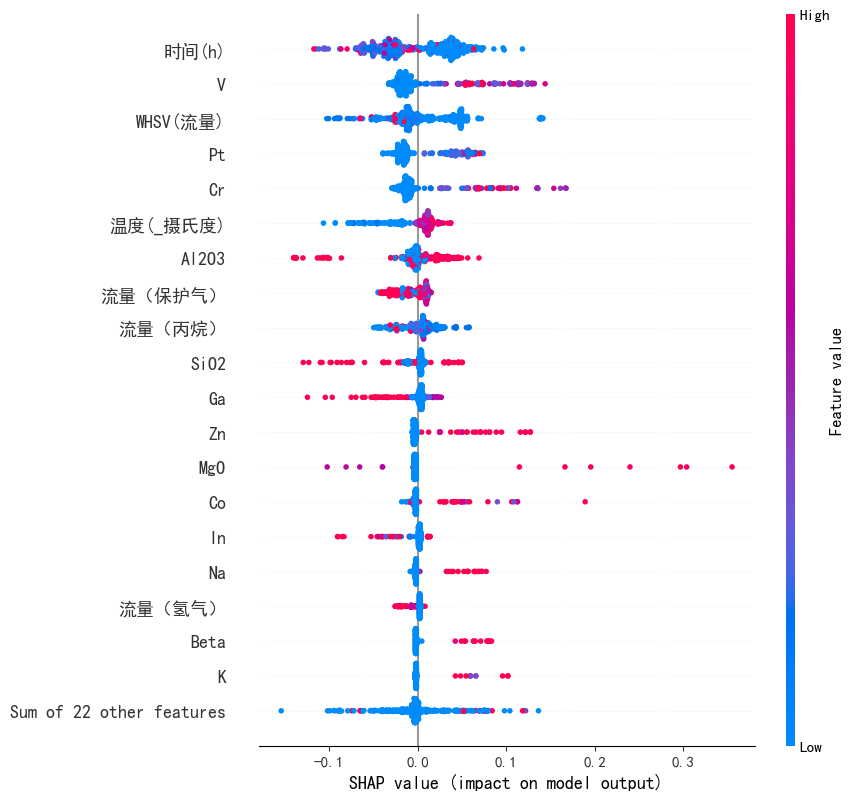

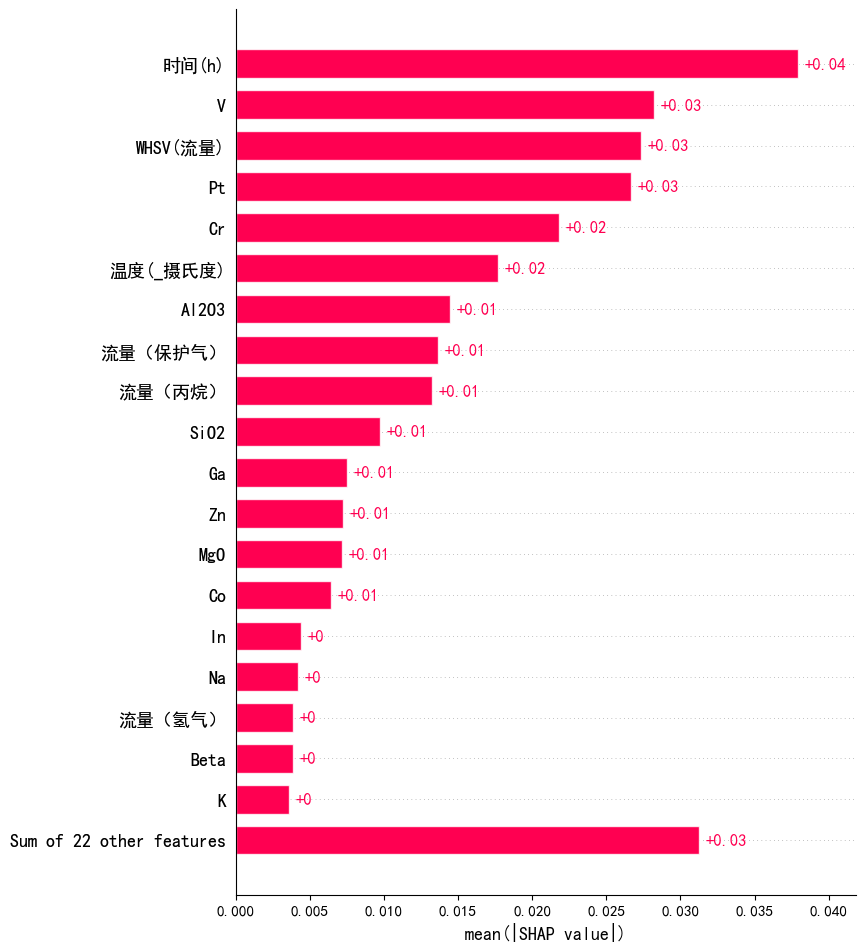

In [ ]:
# shap提高解释性
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer(feat)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)